## **Basic statistical analysis in HealthCare**


## Abstract


## Introduction


The main problem to be solved is the download and statistical analysis of a DataSet. 

The basic difficulty of statistical analysis of real data is that it is prepared or presented in a form that is not convenient for machine methods of statistical analysis. Therefore, this project shows methods of automatic pre-preparation of real data for such cases. The next problem is the ability to competently manipulate and transform big data in order to obtain a convenient statistical report both in tabular form and in the form of graphs.

Therefore, the main goal that we are to achieve in this project is learning how to download, pre-process and conduct basic statistical analysis of personal data obtained during the people survey using modern methods of DataMining.


## Materials and methods


In this lab, we will learn the methods of statistical analysis of data obtained via a people survey on the disease of COVID-19. The laboratory consists of three stages:
* Data download
* Data preparation
* Statistical analysis
* Data visualization

The first stage will show you how to download spreadsheet data:
* indexing of key fields
* working with data types such as datatime
* writing a parser function to automatically create index fields

At the next stage, it will be demonstrated how to pre-prepare data for analysis, in particular:
* elimination of missing data
* replacement and change of cell data
* change the data types of columns

At the stage of statistical analysis, the methods of automation of statistical information calculation will be demonstrated, in particular:
* calculation of basic statistical indicators
* data sorting and grouping
* data transformation DataSet
* calculation of statistical indicators on the transformed data

At the stage of visualization, the possibilities of visualization of the received statistical indicators will be shown.


The statistical data obtained during a survey by scientists of the Department of Artificial Intelligence Systems of the National University of Lviv Polytechnic will be used in this project.
The research was proved accordingly grant 305.2825-20 Stop COVID'19 of Central European Initiative (CEI)


## Prerequisites
* Python,
* Pandas, https://pandas.pydata.org
* SeaBorn, https://seaborn.pydata.org 
* Statistics


## Objectives


After completing this lab, you will be able to:


* Download a DataSet from *.xlsx files
* Automatically change data in the DataSet
* Transform the table
* Visualize the data with pandas and seaborn
* Expect
     * Minimum and maximum value
     * Average
     * Quarters
     * Pivot tables


## Import Libraries/Define Auxiliary Functions


## Load data from a .xlsx file


Some libraries should be imported before you can begin.


In [258]:
import pandas as pd
from datetime import datetime

In [260]:
df = pd.read_excel(r"C:\Users\gkgow\OneDrive\Desktop\ML_LAB\ML_ACTIVITY\COVID_19.xlsx",'Sheet1')

Now let's look at our DataSet.


In [262]:
df

,Date time,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
0,2020-09-20 11:23:15.000,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,Yes,Yes,No,No,38.1
1,2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,No,Yes,No,No,37.0
2,2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,Yes,No,37.8
3,2020-09-20 11:23:15.000,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,No,No,NaN
4,2020-09-20 11:23:15.000,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,2021-03-02 09:56:35.956,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.3
3304,2021-03-02 10:10:18.976,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.4
3305,2021-03-04 11:03:43.786,40-65,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,1.0,No,Yes,Maybe (можливо),No,37.7
3306,2021-03-04 11:04:30.416,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,No,Yes,Maybe (можливо),No,38.0


We can see that the DataSet size is 3308 rows and 14 columns.


However, this DataSet needs some change.


First, you need to select the date and time from the first column as the index field. This will allow you to conveniently group the data depending on the time of its receipt.
Since the date and time can come in different formats, it is convenient to write your own parser function which will transform any date and time format into the Python datetime format.
In our case, we divide any date/time cells into two parts (date and time). Then we allocate only hours, minutes and seconds from time. Then we merge them again and transform them into datetime using **[strptime()](https://docs.python.org/3/library/datetime.html?highlight=strptime#datetime.datetime.strptime)**.
It should also be set how the DataSet describes the missing data because it can negatively affect the statistics.
Then we reload the data from the file.


In [266]:
def parse(x):
    y = x.split()
    t = y[1][:8]
    z=y[0] + " " + t
    d = datetime.strptime(z, '%Y-%m-%d %H:%M:%S')
    return d

In [267]:
df

,Date time,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
0,2020-09-20 11:23:15.000,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,Yes,Yes,No,No,38.1
1,2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,No,Yes,No,No,37.0
2,2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,Yes,No,37.8
3,2020-09-20 11:23:15.000,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,No,No,NaN
4,2020-09-20 11:23:15.000,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,2021-03-02 09:56:35.956,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.3
3304,2021-03-02 10:10:18.976,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.4
3305,2021-03-04 11:03:43.786,40-65,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,1.0,No,Yes,Maybe (можливо),No,37.7
3306,2021-03-04 11:04:30.416,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,No,Yes,Maybe (можливо),No,38.0


## Data preparation


Some respondents did not indicate their gender. This will make further analysis of such data impossible.
Remove rows that do not specify gender using **[dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**:


In [270]:
df = df.dropna(subset=['Gender'])

Some data might be stored in formats that Python misinterprets. Therefore, you can use the **[map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html?highlight=map#pandas.Series.map)** method to replace cell values. For example, you can change the Yes / No value to True / False as follows:


In [272]:
d = {'No' : False, 'Yes' : True}
c = 'Do you vaccinated influenza?'
df.loc[:, c] = df[c].map(d)

In [273]:
df

,Date time,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
0,2020-09-20 11:23:15.000,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,True,Yes,No,No,38.1
1,2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,False,Yes,No,No,37.0
2,2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,False,Yes,Yes,No,37.8
3,2020-09-20 11:23:15.000,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,False,Yes,No,No,NaN
4,2020-09-20 11:23:15.000,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,False,Yes,Yes,No,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,2021-03-02 09:56:35.956,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,True,Yes,Maybe (можливо),No,37.3
3304,2021-03-02 10:10:18.976,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,True,Yes,Maybe (можливо),No,37.4
3305,2021-03-04 11:03:43.786,40-65,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,1.0,False,Yes,Maybe (можливо),No,37.7
3306,2021-03-04 11:04:30.416,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,False,Yes,Maybe (можливо),No,38.0


For further analysis it is necessary to study the general characteristics of the fields using **[info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)**.


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3297 entries, 0 to 3307
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date time                              3297 non-null   datetime64[ns]
 1   Age                                    3296 non-null   object        
 2   Gender                                 3297 non-null   object        
 3   Region                                 3279 non-null   object        
 4   Do you smoke?                          3267 non-null   object        
 5   Have you had Covid`19 this year?       3296 non-null   object        
 6   IgM level                              3221 non-null   object        
 7   IgG level                              3237 non-null   object        
 8   Blood group                            3243 non-null   float64       
 9   Do you vaccinated influenza?           3190 non-null   object       

We can see that all the data of all columns has non-null object type (except the last one). That is an indefinite type of data.
Therefore, it is necessary to transform the data and change its type.


As it can be seen from the table, the Age field should be categorized. For this we can use **[astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype)**:


In [278]:
c = 'Age'
df.loc[:, c] = df[c].astype('category')

In [279]:
df['Age']

0       40-65
1       23-40
2       23-40
3       40-65
4       16-22
        ...  
3303    40-65
3304    40-65
3305    40-65
3306    40-65
3307    16-22
Name: Age, Length: 3297, dtype: object

We can see that this column has now become categorical and has 5 different categories.


All other fields except the last one contain Cyrillic values, so they need to be replaced and also be made categorical. To do this, use the **[lambda](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply)** function for each cell value in the corresponding columns. The main idea in this case is to find the position of the open parenthesis '( ' in the sentence and return the slice of text before it. If there are no parenthesis in the text, leave the text unchanged.


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3297 entries, 0 to 3307
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date time                              3297 non-null   datetime64[ns]
 1   Age                                    3296 non-null   object        
 2   Gender                                 3297 non-null   object        
 3   Region                                 3279 non-null   object        
 4   Do you smoke?                          3267 non-null   object        
 5   Have you had Covid`19 this year?       3296 non-null   object        
 6   IgM level                              3221 non-null   object        
 7   IgG level                              3237 non-null   object        
 8   Blood group                            3243 non-null   float64       
 9   Do you vaccinated influenza?           3190 non-null   object       

The summary statistics can be viewed with the following command **[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)**


In [285]:
df.describe()

,Date time,Blood group,Maximum body temperature
count,3297,3243.000000,1529.000000
mean,2020-12-10 19:29:52.464443136,1.958372,37.710203
min,2020-09-20 11:23:15,1.000000,36.600000
25%,2020-12-17 23:14:18.347000064,1.000000,37.200000
50%,2020-12-24 13:39:36.980999936,2.000000,37.700000
75%,2020-12-28 16:22:47.089999872,2.000000,38.300000
max,2021-04-05 03:18:16.644000,4.000000,38.800000
std,NaN,0.895079,0.634367


In [380]:
df.describe(include=['category'])

,Gender,Region
count,3297,3279
unique,2,7
top,Female (Жінка),"Ukraine, Lviv (Львів)"
freq,1818,3071


## Statistical analysis


As you can see, statistical information consists of the number of unique values, the value of the most popular category and the number of its values.
The detailed information for a specific column can be obtained as follows (**[value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts)**):


In [374]:
df['Age'].value_counts()

Age
23-40    1174
40-65    1063
16-22     823
>65       193
0-15       43
Name: count, dtype: int64

You can also get information in a normalized form.


In [382]:
df['Age'].value_counts(normalize=True)

Age
23-40    0.356189
40-65    0.322512
16-22    0.249697
>65      0.058556
0-15     0.013046
Name: proportion, dtype: float64

### Sorting


You can sort the data by one or a group of columns, you can specify the sort direction or create your own sort rules (for example, for category fields) using **[sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values)**


In [384]:
df.sort_values(by='Age', 
        ascending=True)

,Date time,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
2747,2020-12-30 02:10:07.667,0-15,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),3.0,False,No,Yes,No,NaN
779,2020-12-17 19:19:43.744,0-15,Female (Жінка),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,False,Maybe (можливо),Maybe (можливо),No,NaN
808,2020-12-17 22:59:41.917,0-15,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,False,Yes,Yes,No,NaN
809,2020-12-17 22:59:41.917,0-15,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,False,Yes,Yes,No,NaN
296,2020-10-09 19:35:56.393,0-15,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),4.0,False,No,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,2020-12-18 01:44:32.110,>65,Female (Жінка),"Ukraine, Lviv (Львів)",Yes,No,<0.9 (negative/негативний),<0.9 (negative/негативний),4.0,False,Yes,Yes,No,NaN
1023,2020-12-18 01:44:32.110,>65,Female (Жінка),"Ukraine, Lviv (Львів)",Yes,No,<0.9 (negative/негативний),<0.9 (negative/негативний),4.0,False,Yes,Yes,No,NaN
46,2020-09-22 17:35:09.000,>65,Female (Жінка),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),1.0,False,Yes,No,No,NaN
343,2020-10-12 14:58:30.000,>65,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,False,Yes,No,No,38.4


You should specify the list of fields and the order direction in the **'by'** and **'ascending'** parameters. So, to sort by the fields 'Age' in ascending order and 'Gender' in descending order, you need:


In [386]:
df.sort_values(by=['Age', 'Gender'], ascending=[True, False]).head()

,Date time,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
39,2020-09-20 11:26:09.000,0-15,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,False,Yes,No,No,NaN
198,2020-09-26 11:19:25.000,0-15,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),4.0,False,No,Yes,No,NaN
216,2020-09-26 11:42:15.000,0-15,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),1.0,False,Yes,Maybe (можливо),No,38.7
296,2020-10-09 19:35:56.393,0-15,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),4.0,False,No,Yes,No,NaN
687,2020-11-24 10:55:41.181,0-15,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),1.0,False,Yes,No,No,NaN


### Data transformation


To obtain information on a specific category field, you can use:


In [390]:
df['Gender'].value_counts()

Gender
Female (Жінка)    1818
Male (Чоловік)    1479
Name: count, dtype: int64

The list of unique values can be obtained as follows:


In [392]:
df['Gender'].value_counts().keys()

CategoricalIndex(['Female (Жінка)', 'Male (Чоловік)'], categories=['Female (Жінка)', 'Male (Чоловік)'], ordered=False, dtype='category', name='Gender')

The average value of temperature for women only can be obtained as (**[mean()](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html?highlight=statistical)**):


In [394]:
df[df['Gender'] == 'Female ']['Maximum body temperature'].mean()

nan

The maximum temperature of men who smoke and have COVID-19 is:


In [396]:
df[(df['Gender'] == 'Male ') & (df['Do you smoke?'] == 'Yes') & (df['Have you had Covid`19 this year?'] == 'Yes')]['Maximum body temperature'].max()

nan

Otherwise, you can get complete statistics by class separately by grouping the data.


In [398]:
df.groupby(['Gender'])['Maximum body temperature'].describe()

C:\Users\gkgow\AppData\Local\Temp\ipykernel_28592\295920993.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Gender'])['Maximum body temperature'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female (Жінка),1058.0,37.706805,0.625076,36.6,37.2,37.7,38.2,38.8
Male (Чоловік),471.0,37.717834,0.655371,36.6,37.1,37.7,38.3,38.8


### Pivot tables


Let's suppose that we need to count how many men and women are there of each age group. To do this, use the **[crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=crosstab#pandas.crosstab)** function:


In [400]:
pd.crosstab(df['Age'], df['Gender'])

Gender,Female (Жінка),Male (Чоловік)
Age,,
0-15,15,28
16-22,266,557
23-40,645,529
40-65,795,268
>65,96,97


The table shows that most of the interviewed people are aged from 23 to 65.


To obtain summary information, for example, on body temperature, for men and women of each age group, it is necessary to use a pivot table **[pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html?highlight=pivot_table#pandas.DataFrame.pivot_table)**


In [402]:
pd.pivot_table(df, values= 'Maximum body temperature', index= ['Age'], columns=['Gender'], aggfunc='mean', margins=True)

C:\Users\gkgow\AppData\Local\Temp\ipykernel_28592\1011534889.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values= 'Maximum body temperature', index= ['Age'], columns=['Gender'], aggfunc='mean', margins=True)


Gender,Female (Жінка),Male (Чоловік),All
Age,,,
0-15,38.500000,37.437500,37.555556
16-22,37.731579,37.790196,37.746305
23-40,37.759053,37.754680,37.757473
40-65,37.679435,37.690780,37.681947
>65,37.502041,37.642647,37.583761
All,37.706528,37.717834,37.710013


This table shows the average temperature for women and men in terms of age groups.


## Visualize Data


Now let's visualize our data. 
We will use SeaBorn library.



Import the library.


In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = df.dropna(subset=['Age', 'Gender'])  # Drop rows with missing values in 'Age' or 'Gender'

Visualize the number of surveyed men and women in terms of age groups using **[countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html)**:


<Axes: xlabel='Age', ylabel='count'>

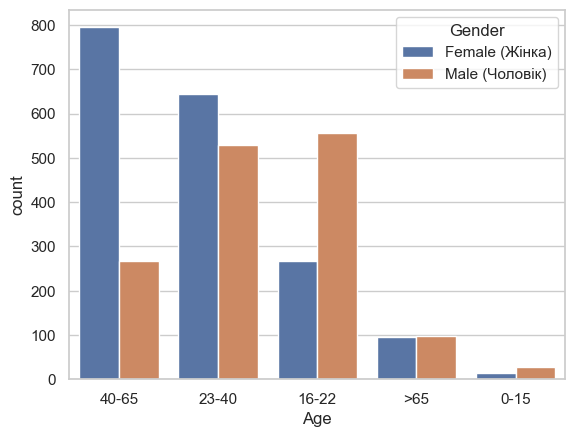

In [406]:
sns.countplot( data=df,x='Age', hue='Gender')

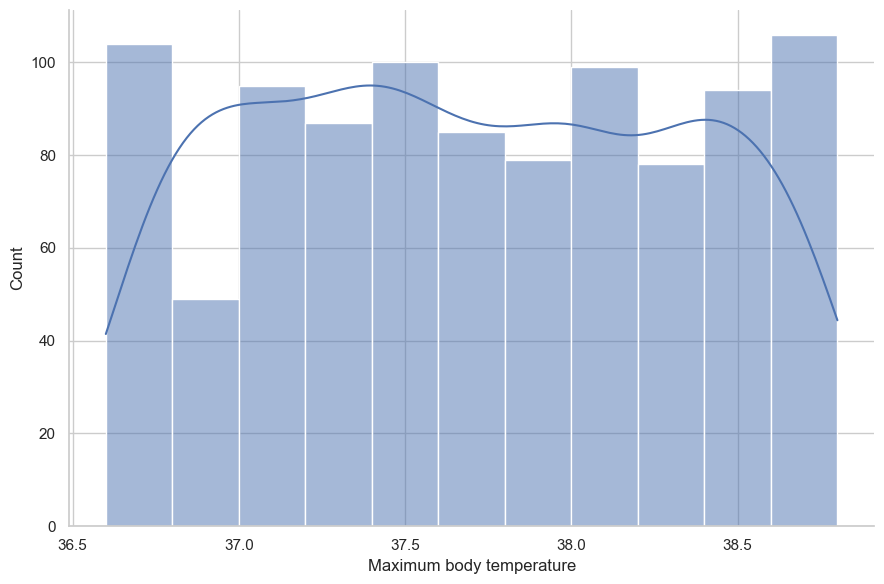

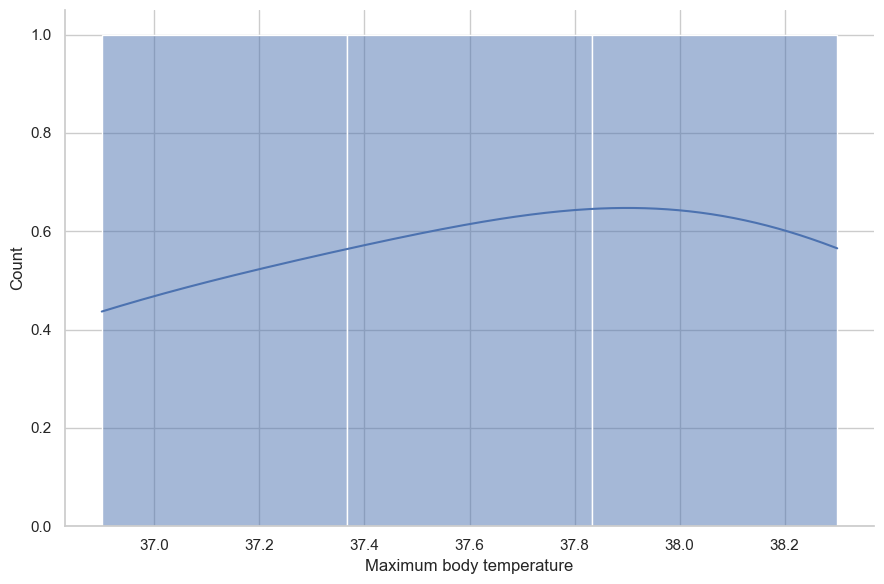

In [408]:
# Plot for 'Yes'
df_t = df[df['Have you had Covid`19 this year?'] == 'Yes'].dropna(subset=['Maximum body temperature'])
sns.displot(df_t['Maximum body temperature'], kde=True, height=6, aspect=1.5)
# Plot for 'Maybe'
df_t = df[df['Have you had Covid`19 this year?'] == 'Maybe'].dropna(subset=['Maximum body temperature'])
sns.displot(df_t['Maximum body temperature'], kde=True, height=6, aspect=1.5)
plt.show()

# Set Seaborn style for nicer plots

In [410]:
sns.set(style="whitegrid")

In [412]:
df = df.dropna(subset=['Maximum body temperature'])

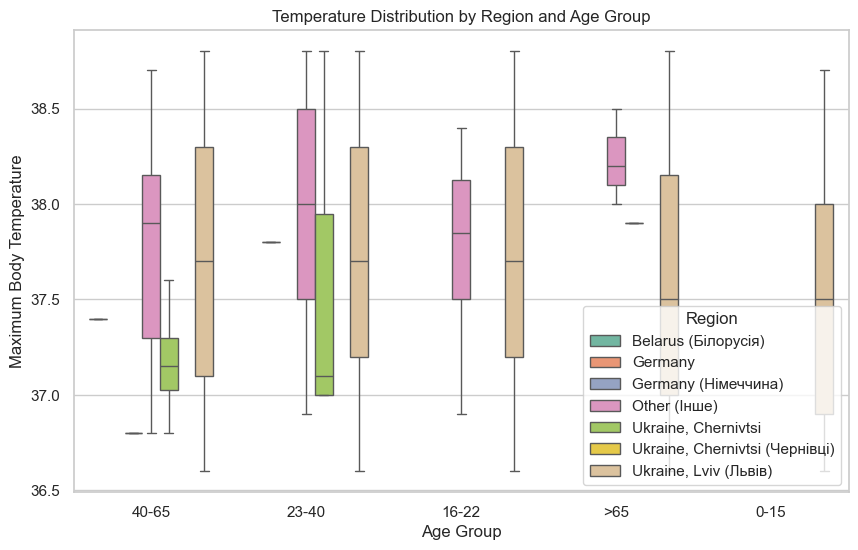

In [414]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Maximum body temperature', hue='Region', data=df, palette="Set2")
plt.title("Temperature Distribution by Region and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Maximum Body Temperature")
plt.show()

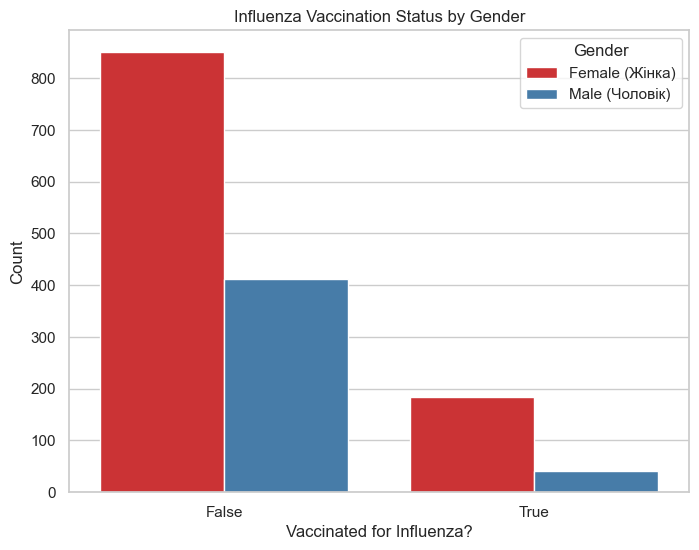

In [416]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Do you vaccinated influenza?', hue='Gender', palette="Set1")
plt.title("Influenza Vaccination Status by Gender")
plt.xlabel("Vaccinated for Influenza?")
plt.ylabel("Count")
plt.show()

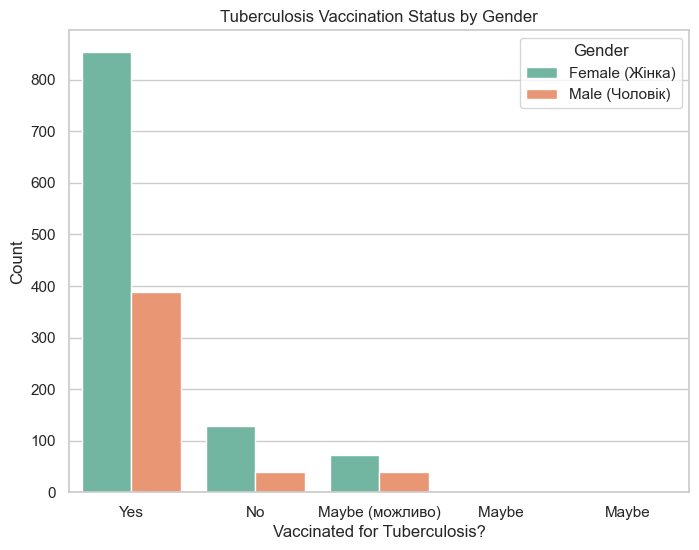

In [418]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Do you vaccinated tuberculosis?', hue='Gender', palette="Set2")
plt.title("Tuberculosis Vaccination Status by Gender")
plt.xlabel("Vaccinated for Tuberculosis?")
plt.ylabel("Count")
plt.show()

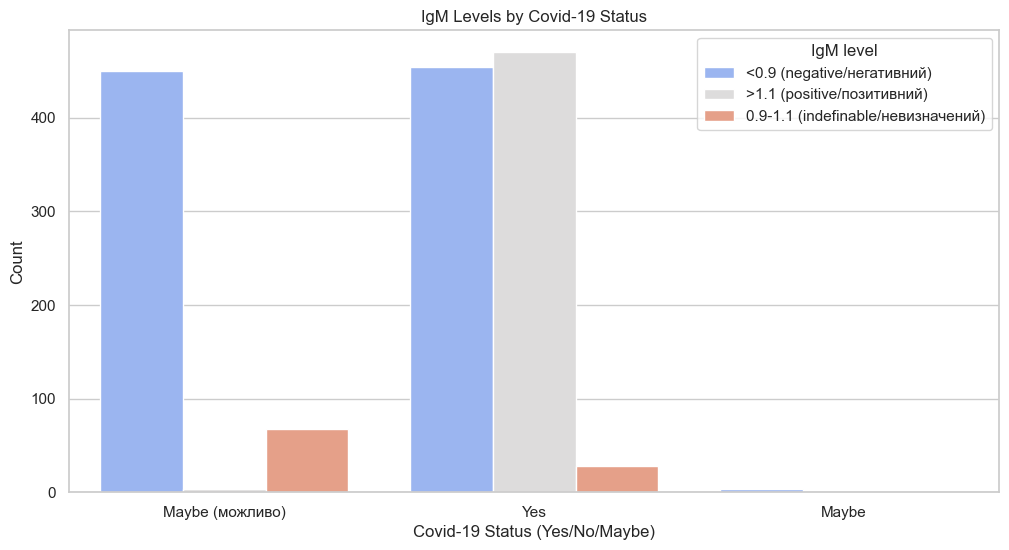

In [420]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Have you had Covid`19 this year?', hue='IgM level', palette="coolwarm")
plt.title("IgM Levels by Covid-19 Status")
plt.xlabel("Covid-19 Status (Yes/No/Maybe)")
plt.ylabel("Count")
plt.show()


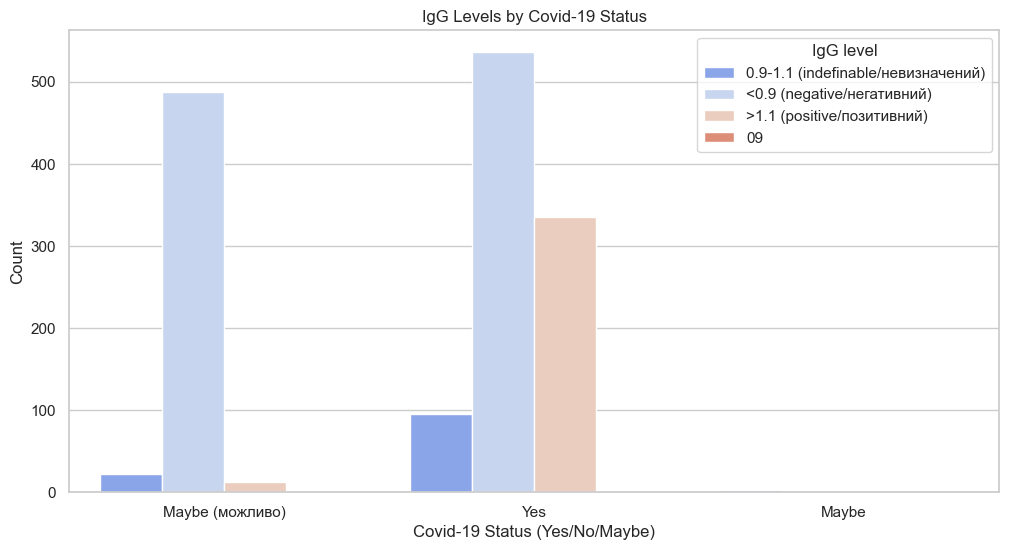

In [422]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Have you had Covid`19 this year?', hue='IgG level', palette="coolwarm")
plt.title("IgG Levels by Covid-19 Status")
plt.xlabel("Covid-19 Status (Yes/No/Maybe)")
plt.ylabel("Count")
plt.show()

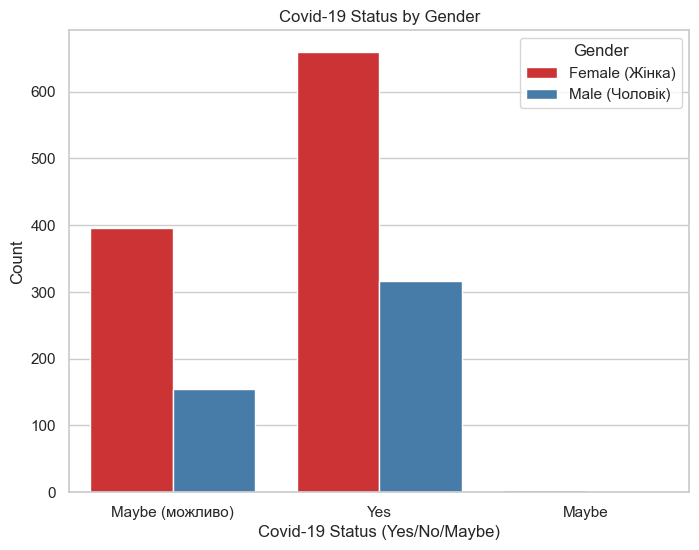

In [424]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Have you had Covid`19 this year?', hue='Gender', palette="Set1")
plt.title("Covid-19 Status by Gender")
plt.xlabel("Covid-19 Status (Yes/No/Maybe)")
plt.ylabel("Count")
plt.show()


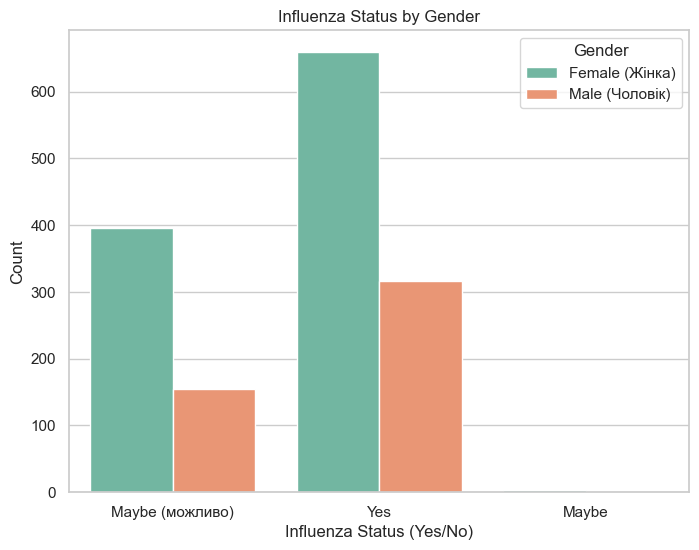

In [426]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Have you had Covid`19 this year?', hue='Gender', palette="Set2")
plt.title("Influenza Status by Gender")
plt.xlabel("Influenza Status (Yes/No)")
plt.ylabel("Count")
plt.show()

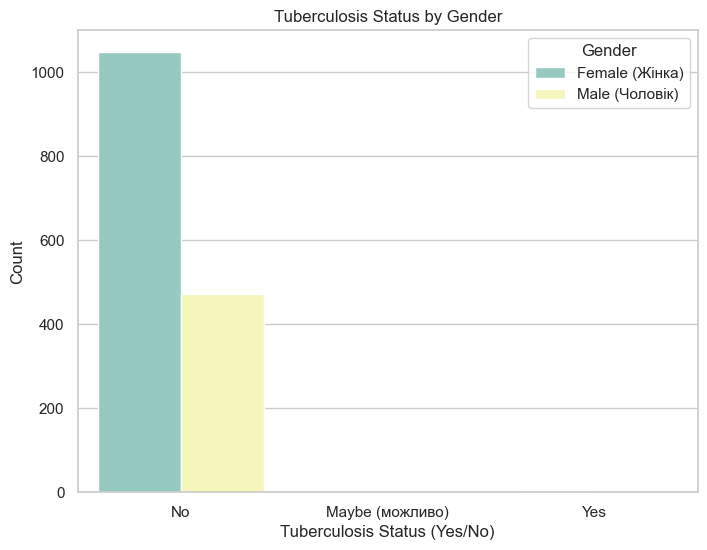

In [428]:
# Tuberculosis Status by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Have you had tuberculosis this year? ', hue='Gender', palette="Set3")
plt.title("Tuberculosis Status by Gender")
plt.xlabel("Tuberculosis Status (Yes/No)")
plt.ylabel("Count")
plt.show()

In [432]:
print(df.columns)

Index(['Date time', 'Age', 'Gender', 'Region', 'Do you smoke?',
       'Have you had Covid`19 this year?', 'IgM level', 'IgG level',
       'Blood group', 'Do you vaccinated influenza?',
       'Do you vaccinated tuberculosis?', 'Have you had influenza this year?',
       'Have you had tuberculosis this year? ', 'Maximum body temperature'],
      dtype='object')


In [434]:
def categorize_temp(temp):
    if temp < 36.0:
        return 'Hypothermia'
    elif 36.0 <= temp <= 37.5:
        return 'Normal'
    else:
        return 'Fever'

# Apply the categorization function to create the Temp Category column
df['Temp Category'] = df['Maximum body temperature'].apply(categorize_temp)


C:\Users\gkgow\AppData\Local\Temp\ipykernel_28592\3982618680.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temp Category'] = df['Maximum body temperature'].apply(categorize_temp)


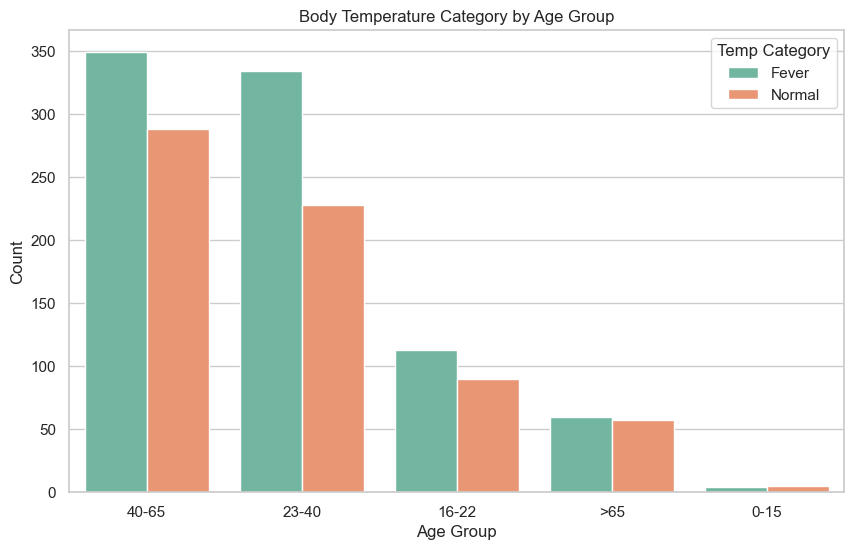

In [436]:
# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='Temp Category', palette="Set2")
plt.title("Body Temperature Category by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


In [ ]:
# Print column names to verify the exact names
print(df.columns)

C:\Users\gkgow\AppData\Local\Temp\ipykernel_28592\4047026277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age', y='Maximum body temperature', data=df, inner="quart", palette="muted")


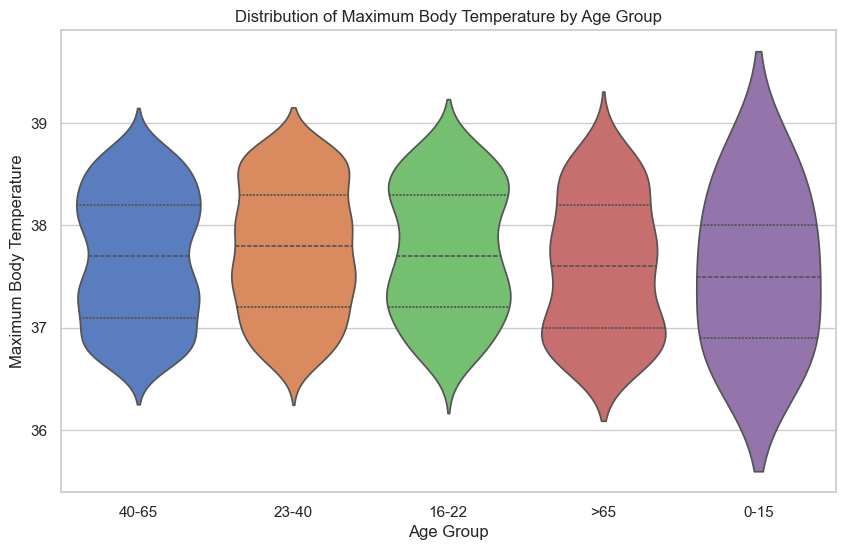

In [452]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='Maximum body temperature', data=df, inner="quart", palette="muted")
plt.title("Distribution of Maximum Body Temperature by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Maximum Body Temperature")
plt.show()


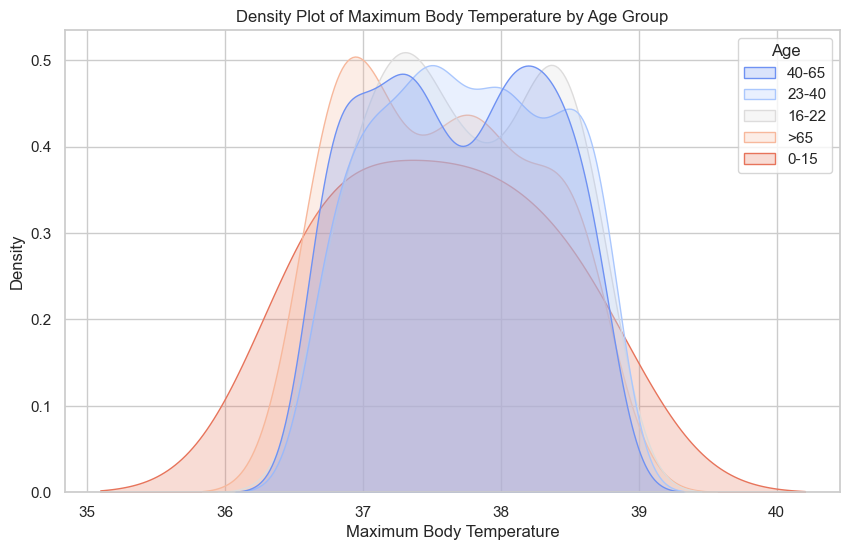

In [455]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Maximum body temperature', hue='Age', common_norm=False, fill=True, palette="coolwarm")
plt.title("Density Plot of Maximum Body Temperature by Age Group")
plt.xlabel("Maximum Body Temperature")
plt.ylabel("Density")
plt.show()


In [474]:
print(df.columns)

Index(['Date time', 'Age', 'Gender', 'Region', 'Do you smoke?',
       'Have you had Covid`19 this year?', 'IgM level', 'IgG level',
       'Blood group', 'Do you vaccinated influenza?',
       'Do you vaccinated tuberculosis?', 'Have you had influenza this year?',
       'Have you had tuberculosis this year? ', 'Maximum body temperature',
       'Temp Category'],
      dtype='object')


## Conclusions


As practice shows, the data obtained in real field experiments is not suitable for direct statistical processing. Therefore, in this project we learned the basic methods of downloading and preliminary data preparation.
Unlike the well-known classical approaches to statistical data analysis, Python contains many powerful libraries that allow you to manipulate data easily and quickly. Therefore, we have learned the basic methods of automating a library such as Pandas for statistical data analysis. We also learned the basic methods of visualizing the obtained data with the SeaBorn library which also contains effective means of visual data analysis.
